<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    70.983326  74.304104  38.905081  0.002800  194.195311   
      1.0    86.809174  63.271046  79.278543  0.010392  239.369154   
      2.0    63.538876  44.139242  42.828862 -0.010128  160.496852   
      3.0    63.733601  39.051019  71.560441  0.009169  184.354230   
      4.0    63.295718  32.287796  95.088108  0.000294  200.671915   
...                ...        ...        ...       ...         ...   
999.0 15.0   71.694820  83.117829  62.165421  0.000592  226.978662   
      16.0   54.636273  76.440333  57.774477  0.003104  198.854186   
      17.0   22.298031  27.923939  95.937221 -0.019115  156.140076   
      18.0   74.424075  78.718408  82.354494  0.001315  245.498292   
      19.0   66.800770  58.963673  85.139107 -0.001768  220.901782   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.194356  0.000955  
      1.0    239.358760  0.010395  
      2.0    160.506803 -0.009951  
      3.0    184.345709  0.008521  
      4.0    200.672747 -0.000832  
...                 ...       ...  
999.0 15.0   226.982019 -0.003358  
      16.0   198.850929  0.003257  
      17.0   156.144842 -0.004766  
      18.0   245.500648 -0.002356  
      19.0   220.902327 -0.000545  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    70.983326  74.304104  38.905081  0.002800  194.195311   
      1.0    86.809174  63.271046  79.278543  0.010392  239.369154   
      2.0    63.538876  44.139242  42.828862 -0.010128  160.496852   
      3.0    63.733601  39.051019  71.560441  0.009169  184.354230   
      4.0    63.295718  32.287796  95.088108  0.000294  200.671915   
...                ...        ...        ...       ...         ...   
999.0 15.0   71.694820  83.117829  62.165421  0.000592  226.978662   
      16.0   54.636273  76.440333  57.774477  0.003104  198.854186   
      17.0   22.298031  27.923939  95.937221 -0.019115  156.140076   
      18.0   74.424075  78.718408  82.354494  0.001315  245.498292   
      19.0   66.800770  58.963673  85.139107 -0.001768  220.901782   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.194356  0.000955  
      1.0    239.358760  0.010395  
      2.0    160.506803 -0.009951  
      3.0    184.345709  0.008521  
      4.0    200.672747 -0.000832  
...                 ...       ...  
999.0 15.0   226.982019 -0.003358  
      16.0   198.850929  0.003257  
      17.0   156.144842 -0.004766  
      18.0   245.500648 -0.002356  
      19.0   220.902327 -0.000545  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    70.983326  74.304104  38.905081  0.002800  194.195311   
      1.0    86.809174  63.271046  79.278543  0.010392  239.369154   
      2.0    63.538876  44.139242  42.828862 -0.010128  160.496852   
      3.0    63.733601  39.051019  71.560441  0.009169  184.354230   
      4.0    63.295718  32.287796  95.088108  0.000294  200.671915   
...                ...        ...        ...       ...         ...   
999.0 15.0   71.694820  83.117829  62.165421  0.000592  226.978662   
      16.0   54.636273  76.440333  57.774477  0.003104  198.854186   
      17.0   22.298031  27.923939  95.937221 -0.019115  156.140076   
      18.0   74.424075  78.718408  82.354494  0.001315  245.498292   
      19.0   66.800770  58.963673  85.139107 -0.001768  220.901782   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.194356  0.000955  
      1.0    239.358760  0.010395  
      2.0    160.506803 -0.009951  
      3.0    184.345709  0.008521  
      4.0    200.672747 -0.000832  
...                 ...       ...  
999.0 15.0   226.982019 -0.003358  
      16.0   198.850929  0.003257  
      17.0   156.144842 -0.004766  
      18.0   245.500648 -0.002356  
      19.0   220.902327 -0.000545  

[20000 rows x 7 columns]

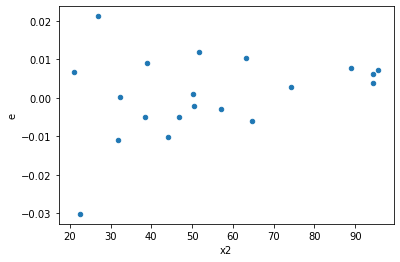

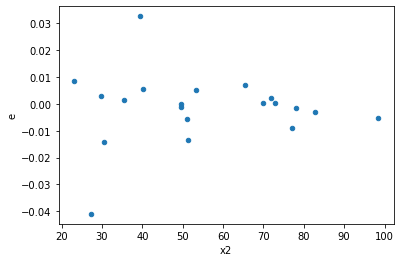

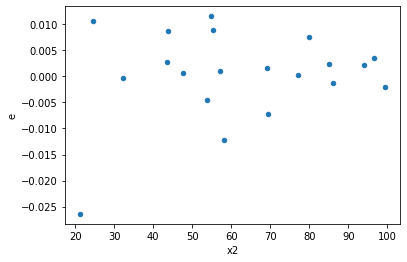

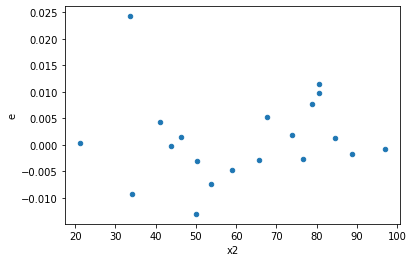

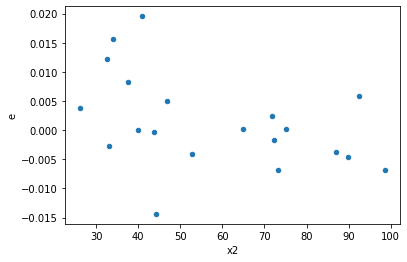

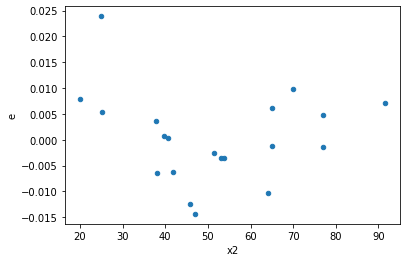

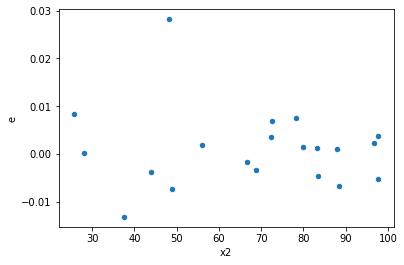

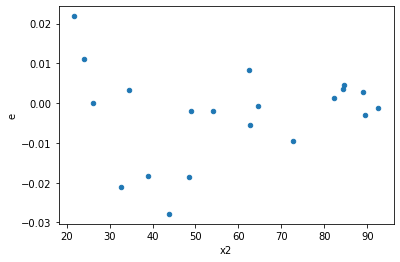

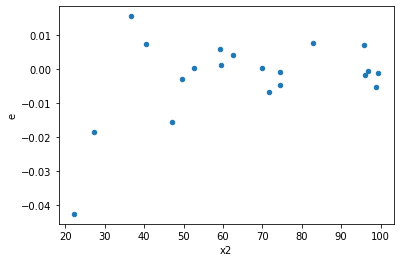

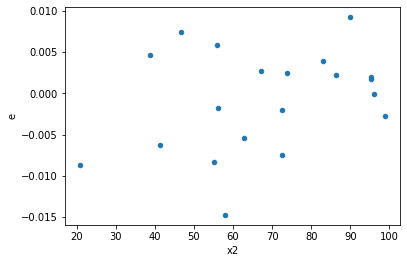

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,6.89111480064441e-05,0.00011245341280902235,1.378222960128882e-05,2.249068256180447e-05,1.6318609697012518,0.6040689507286507,0.6979655246356746,0.30203447536432537,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,9.391063140416323e-05,0.00019809822804751518,1.8782126280832648e-05,3.9619645609503034e-05,2.1094334590826005,0.4320912915052215,0.7839543542473892,0.21604564575261076,Reject001=1 : Homoscedasticity
21.0,5.0,5.0,0.00012674757243019238,0.0002208855799039026,2.5349514486038476e-05,4.417711598078052e-05,1.7427203982589707,0.5569495439288379,0.7215252280355811,0.27847477196441894,Reject001=1 : Homoscedasticity
44.0,5.0,5.0,9.230924747457814e-05,0.00026167200806004375,1.846184949491563e-05,5.233440161200875e-05,2.8347323287637884,0.27743796340628024,0.8612810182968599,0.13871898170314012,Reject001=1 : Homoscedasticity
50.0,5.0,5.0,0.00017003097507823796,0.0004584632162614687,3.400619501564759e-05,9.169264325229373e-05,2.6963511563143814,0.30028589335656,0.84985705332172,0.15014294667828,Reject001=1 : Homoscedasticity
53.0,5.0,5.0,0.0001835462534995001,0.00021350025555504114,3.670925069990002e-05,4.270005111100823e-05,1.163195932820403,0.8722897569464387,0.5638551215267806,0.43614487847321937,Reject001=1 : Homoscedasticity
70.0,5.0,5.0,9.321034698555526e-05,0.00017104299487907538,1.8642069397111052e-05,3.4208598975815075e-05,1.8350215443955142,0.5213807137860829,0.7393096431069586,0.26069035689304143,Reject001=1 : Homoscedasticity
79.0,5.0,5.0,0.00027463329368142996,0.0005926308839646151,5.4926658736285994e-05,0.00011852617679292302,2.157898905920915,0.4185122656574667,0.7907438671712667,0.20925613282873334,Reject001=1 : Homoscedasticity
81.0,5.0,5.0,0.00025378610000292303,0.00034792998699943934,5.0757220000584606e-05,6.958599739988787e-05,1.370957617440167,0.7376260339620764,0.6311869830189618,0.3688130169810382,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0005659540492213054,0.00012103789822119196,0.00011319080984426109,2.4207579644238394e-05,0.21386523939130336,0.11577986339258486,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.0014124967725771295,7.513099177851875e-05,0.0002824993545154259,1.5026198355703749e-05,0.05319020420941614,0.005894223432791751,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,0.0006086904391092658,8.524043063539254e-05,0.00012173808782185316,1.704808612707851e-05,0.1400390496688762,0.05007987646544824,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.00045471980393468225,0.00010275234921530574,9.094396078693645e-05,2.055046984306115e-05,0.22596849384212328,0.12832726971409913,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.0005076383713187958,0.00010082798765117916,0.00010152767426375917,2.0165597530235832e-05,0.19862168296938962,0.10059685375105794,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,6.89111480064441e-05,0.00011245341280902235,1.378222960128882e-05,2.249068256180447e-05,1.6318609697012518,0.6040689507286507,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.0002968477535492619,0.00026441060088782146,5.9369550709852375e-05,5.288212017756429e-05,0.8907279833732766,0.9020502740697103,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.0006949246369063172,0.00046344073607099514,0.00013898492738126343,9.268814721419903e-05,0.6668935183161043,0.6674799170141006,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.0003624336797210781,0.00011960658747549239,7.248673594421561e-05,2.3921317495098477e-05,0.3300095829050415,0.2490521321149937,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      883
Reject001=0 : Heteroscedasticity    117
Name: Result_test, dtype: int64